# Regresión logística multiclase

Para este caso vamos a diferenciar entre diferentes tipos de frijoles secos a partir de la información proveniente de un sistema de computer vision usando el Dry Bean Dataset

## Importamos librerías

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Carga e inspección de los datos

### Importamos nuestros datos

In [55]:
df=pd.read_csv('/work/Dry_Bean.csv')

### Hacemos una revisión rápida de nuestros tipos de datos y si tenemos datos nulos

In [56]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Vemos que por ahora todo bien, sin datos nulos y con los tipos de datos bien asignados

### Eliminar valores duplicados

podemos usar el método .drop_duplicates(inplace=True) para eliminar duplicados en caso de tenerlos

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.shape

(13543, 17)

En este caso si que teníamos duplicados, ahora tenemos 13543 registros

### Revisión de proporciones en los datos

Ahora, vamos a revisar cuantos registros tenemos para cada  una de nuestras clases

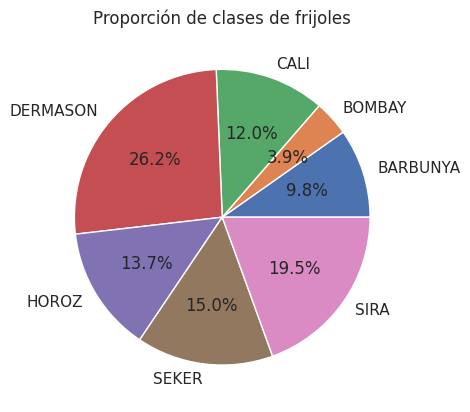

In [60]:
labels,counts=np.unique(df.Class,return_counts=True)
plt.pie(counts,autopct='%1.1f%%',labels=labels)
plt.title('Proporción de clases de frijoles');

In [61]:
pd.Series(counts,index=labels)

BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1860
SEKER       2027
SIRA        2636
dtype: int64

Vemos que nuestras clases están muy desbalanceadas, donde clases como BOMBAY solo llegan al 3.9%. Esto afecta negativamente el desempeño de nuestra regresión logística para clasificar las clases con menos registros ya que son muy pocos los elementos que pertenecen a estas.

## Balanceo de clases con imblearn

Tenemos dos formas de afrontar el problema del **Desbalaceo de clases:**

- Hacer que todas las clases tengan la misma cantidad de registros que la que menos tiene, lo cual como efecto negativo tiene que eliminamos muchos registros que nos pueden ser útiles

- Hacer que todas las clases tengan la misma cantidad de registros creando ejemplos que no afecten la desviación estándar o la varianza de el conjunto de datos de cada clase. El problema de esto es que creamos ejemplo que pueden ser irreales y nuevamente afectar negativamente el desempeño del modelo

Para este caso, ya que nuestro dataset tiene muchos registros, incluso para la menor que es BOMBAY con 522 registros vamos a reducir la cantidad de registros de las clases, es decir, vamos a hacer Undersampling

Para esta tarea, usaremos la librería imblearn que es muy útil para estas situaciones

In [62]:
from imblearn.under_sampling import RandomUnderSampler

Creamos el modelo de Undersampling

In [63]:
under=RandomUnderSampler(random_state=42)

Separamos los features del target

In [64]:
X=df.drop('Class',axis=1)
y=df.Class

Ajustamos el modelo y hacemos el Undersampling

In [65]:
X_under,y_under=under.fit_resample(X,y)

Hacemos un count plot para observar que tenemos la misma cantidad de datos

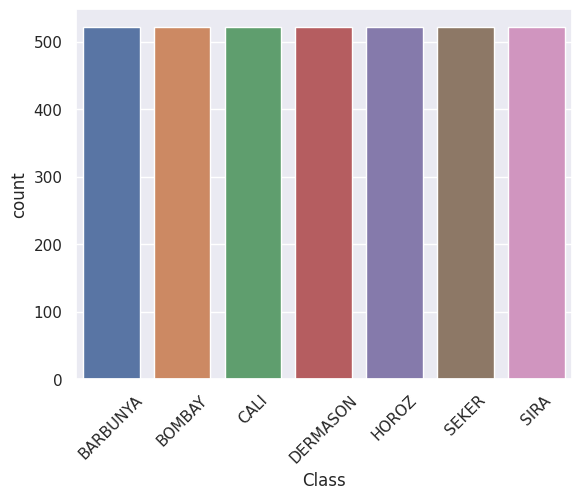

In [66]:
sns.countplot(x=y_under)
plt.xticks(rotation=45)
plt.show()

ahora tenemos que hacer un mapeo numérico de nuestras clases para que el modelo pueda trabajar mejor

In [67]:
list(np.unique(y_under))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [68]:
y_under.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [69]:
list(np.unique(y_under))

[1, 2, 3, 4, 5, 6, 7]

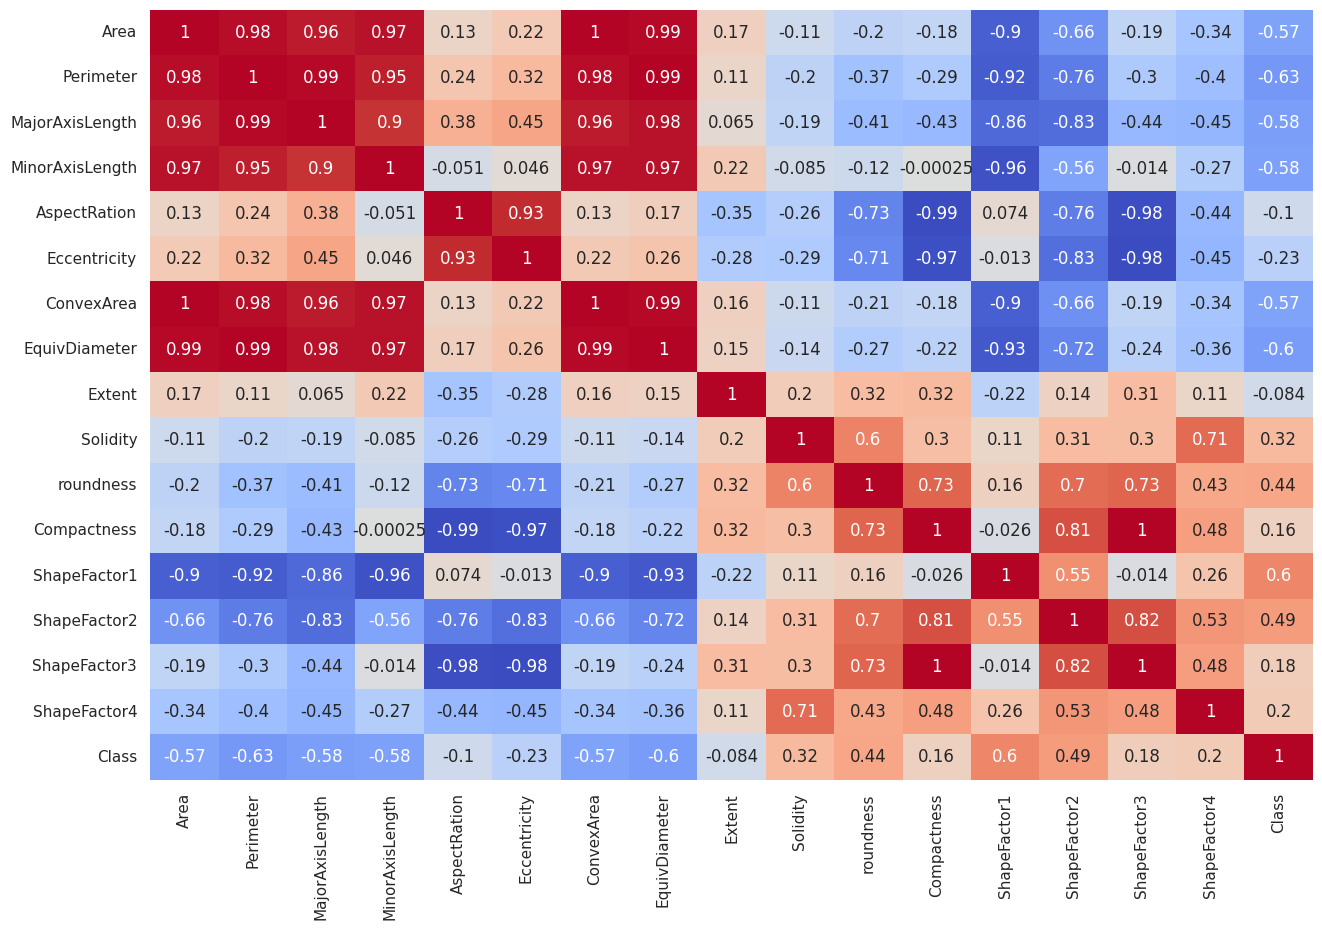

In [70]:
df_under=X_under.copy()
df_under['Class']=y_under
plt.figure(figsize=(15,10))
sns.heatmap(df_under.corr(), annot= True, cmap='coolwarm',cbar=False);

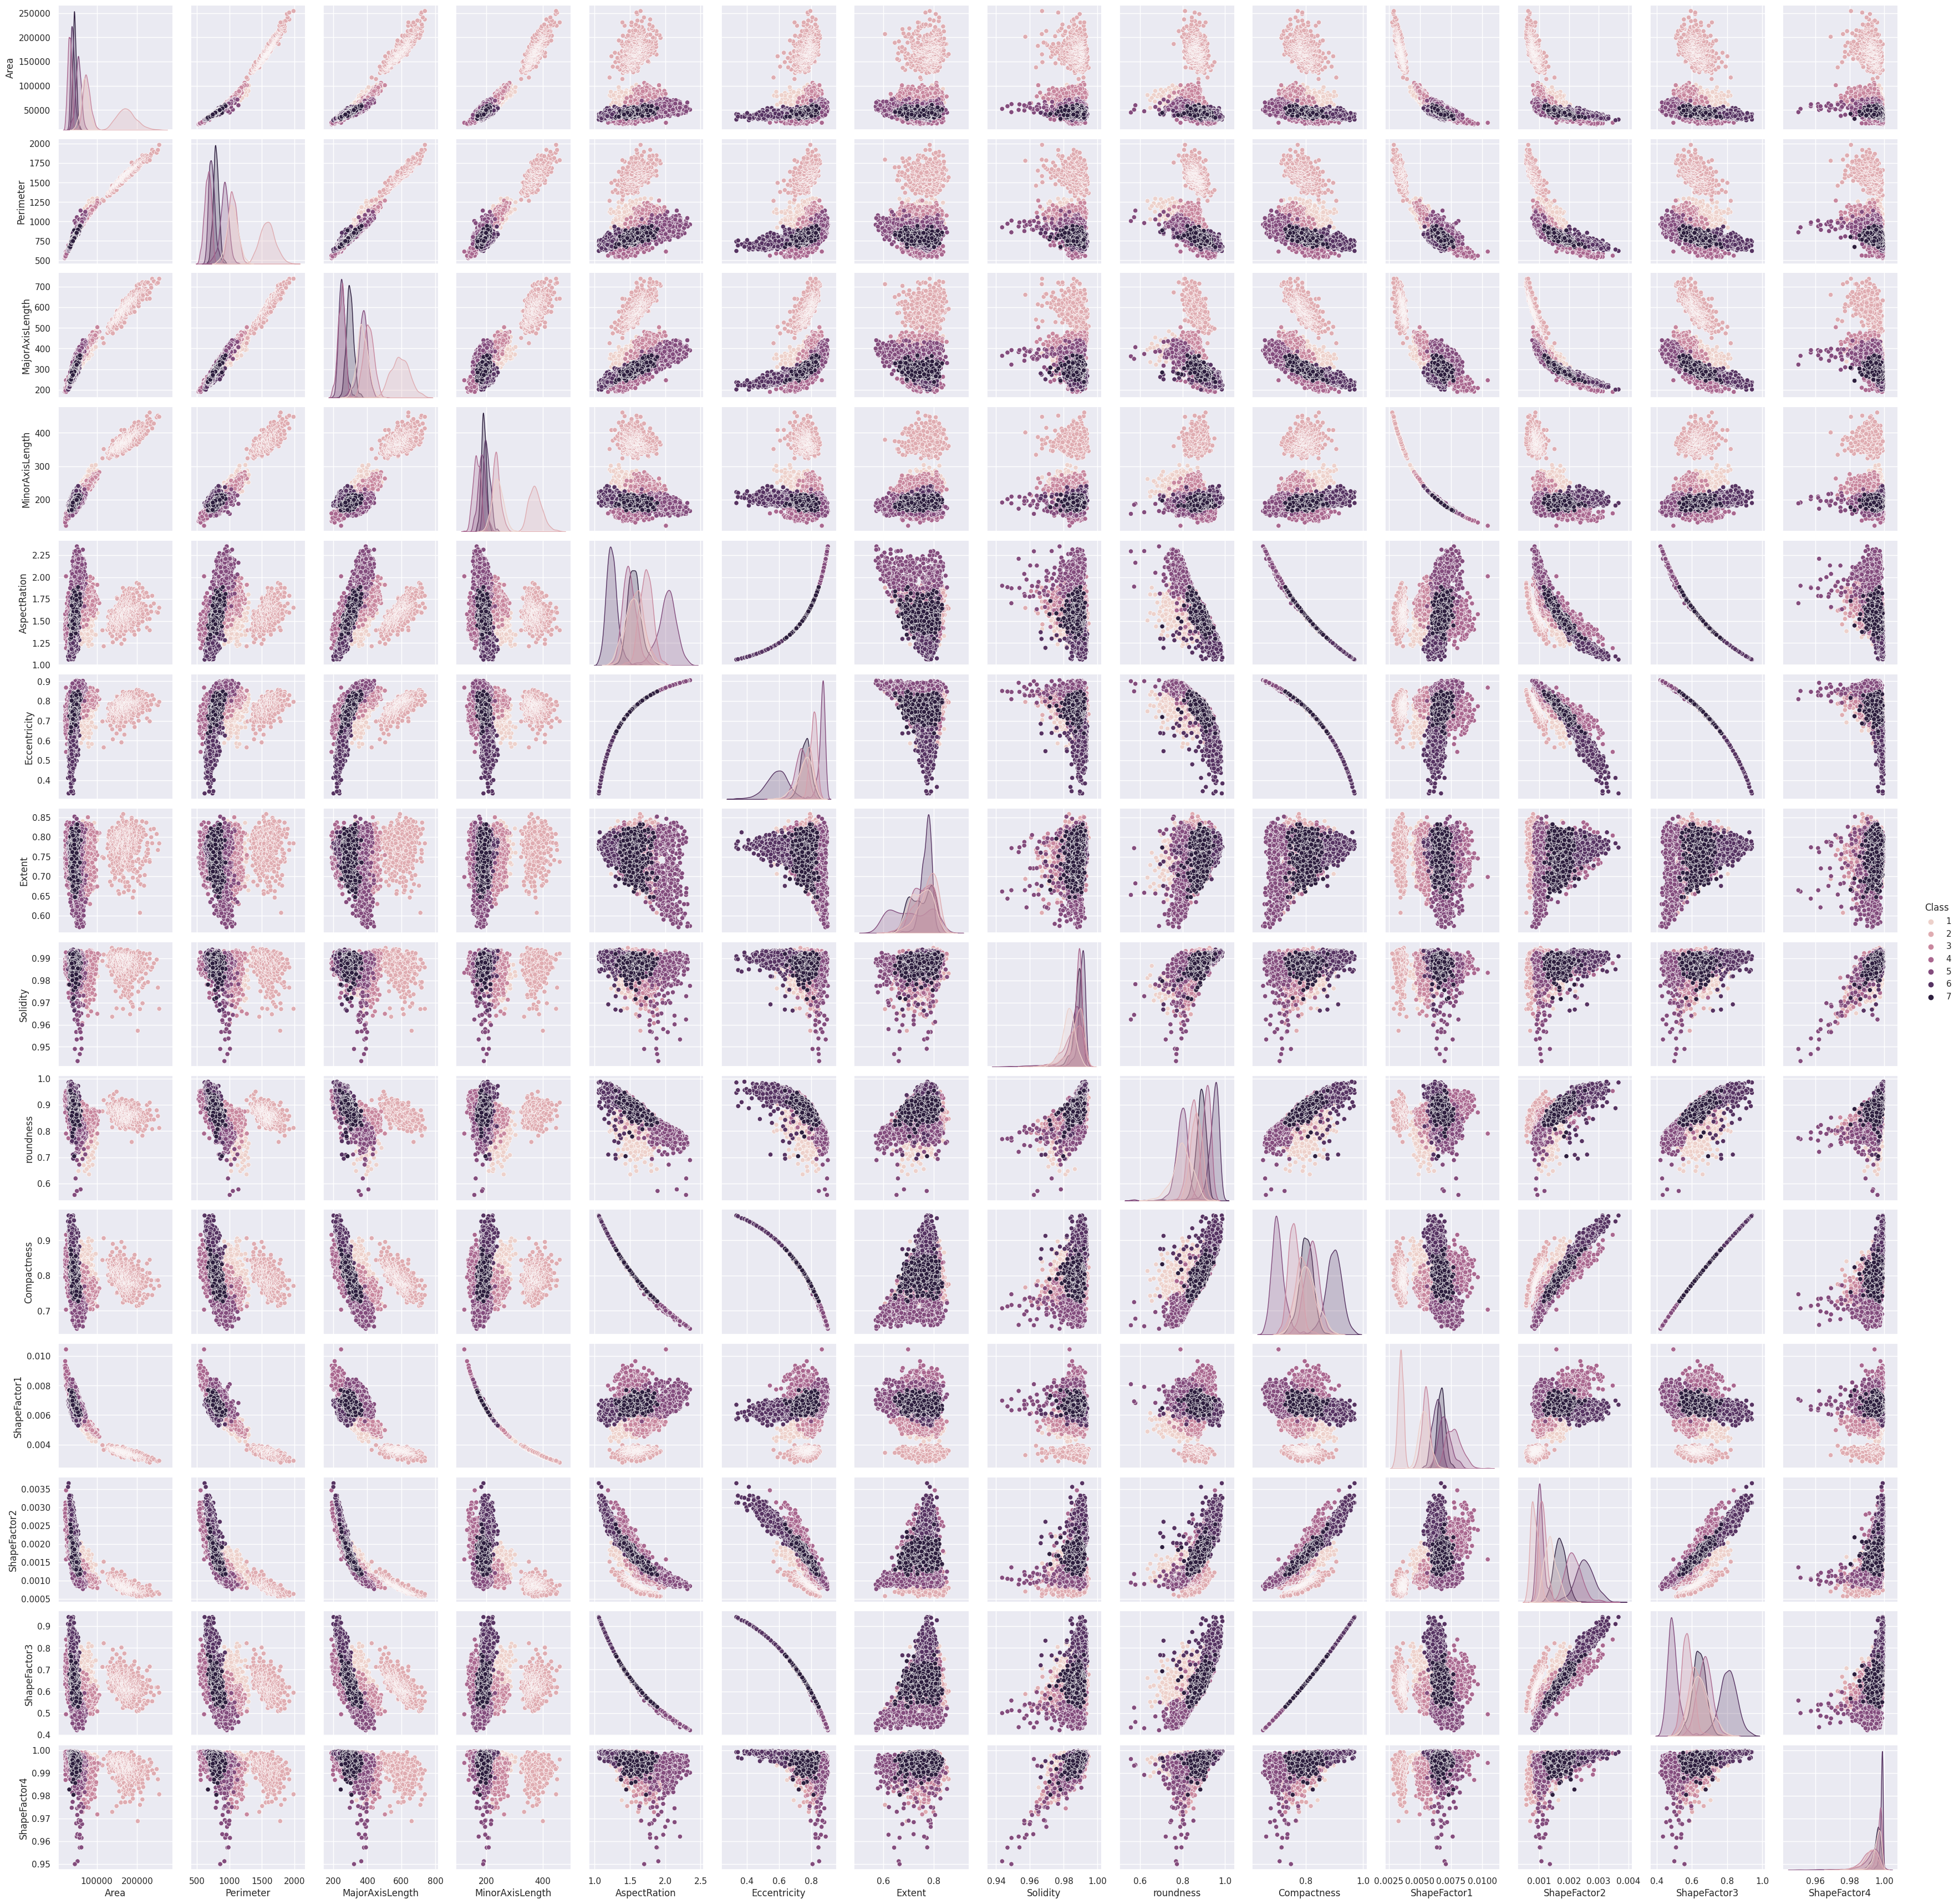

In [44]:
sns.pairplot(df_under, hue='Class');

Tenemos 2 pares de variables con un coeficiente de correlación de 1, observemos estas variables con un scatter-plot

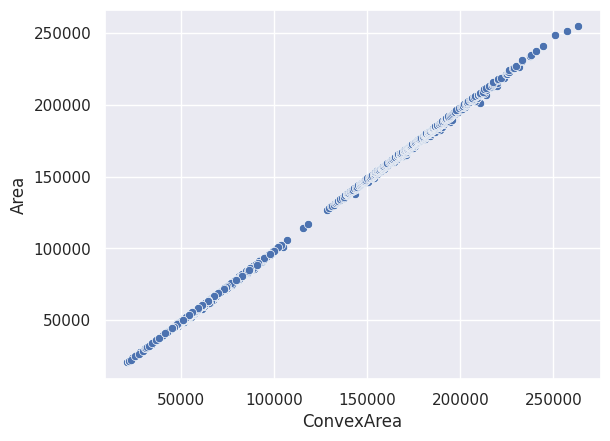

In [40]:
sns.scatterplot(df_under,x='ConvexArea',y='Area');

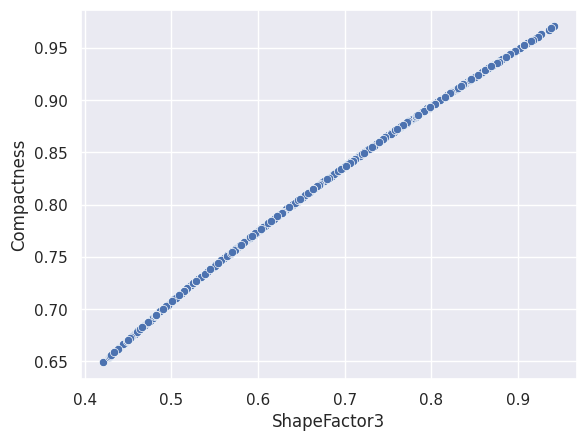

In [31]:
sns.scatterplot(df_under,x='ShapeFactor3',y='Compactness');

Procedemos a eliminar 1 de cada par de features que presentan multicolinealidad

In [71]:
X_under.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True) 

# Creación del modelo

## División de training y test

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, random_state=42, shuffle=True, test_size= 0.2) 

## Escalamiento de los features

In [74]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

## Creación del modelo

In [116]:
logreg=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=42, solver='lbfgs',C=0.009)
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

0.9274965800273598

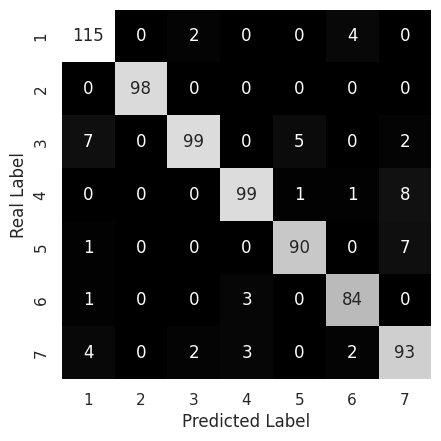

In [125]:
cm=confusion_matrix(logreg.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d",
    yticklabels=logreg.classes_,
    xticklabels=logreg.classes_
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

In [121]:
logreg.classes_

array([1, 2, 3, 4, 5, 6, 7])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a8c1f55-79ef-42c3-8fb6-b2930d81a137' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>